In [14]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

mins = df[df['Element'] == 'TMIN']
maxs = df[df['Element'] == 'TMAX']

mins = mins.groupby(['Date', 'Element'])['Data_Value'].min().unstack()
maxs = maxs.groupby(['Date', 'Element'])['Data_Value'].max().unstack()

In [17]:
by_day = mins.merge(maxs, left_index=True, right_index=True)
by_day['year'] = by_day.index.year

# Convert to celcius
by_day['TMIN'] = by_day['TMIN'] / 10
by_day['TMAX'] = by_day['TMAX'] / 10

In [18]:
by_day_15 = by_day[by_day['year'] == 2015]
by_year = by_day.groupby('year').agg({'TMIN':'min', 'TMAX':'max'})

by_year_05to14 = by_year.loc[by_year.index < 2015]

record_min = by_day.loc[by_day['year'] < 2015, 'TMIN'].min()
record_max = by_day.loc[by_day['year'] < 2015, 'TMAX'].max()
by_day_15 = by_day.loc[by_day['year'] == 2015]

below_min_15 = by_day_15[by_day_15['TMIN'] < record_min]
above_max_15 = by_day_15[by_day_15['TMAX'] > record_max]

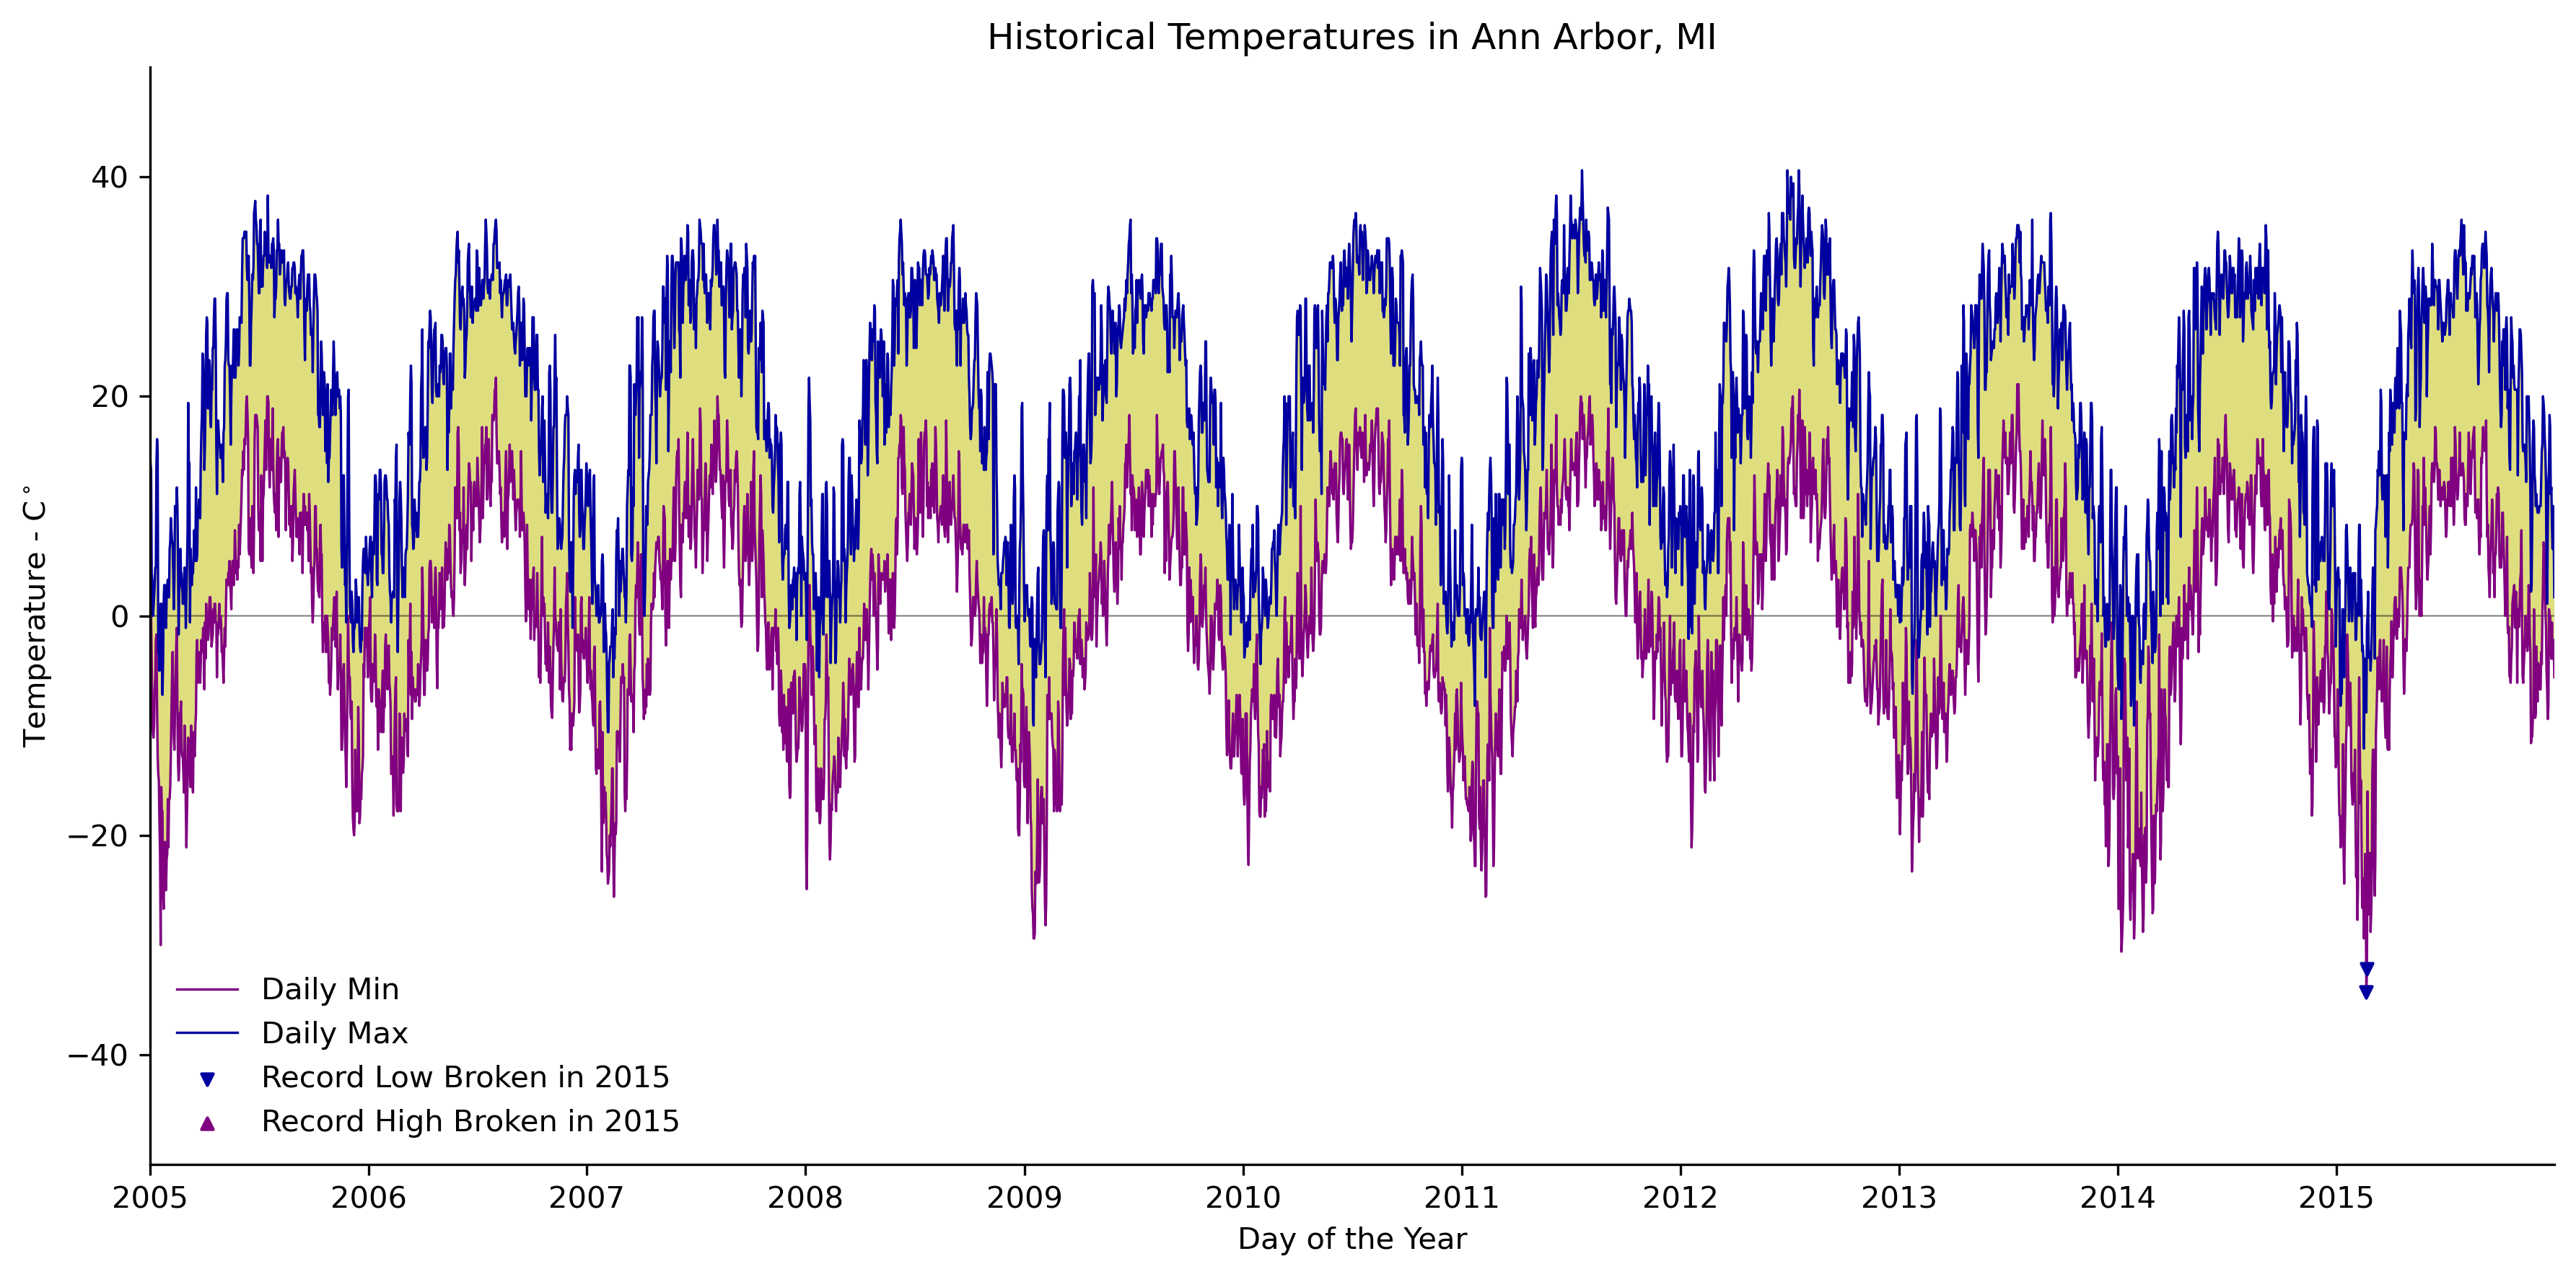

In [23]:

%matplotlib inline
import matplotlib.cm as cm

fig = plt.figure(figsize=(12,6), dpi=300)

plt.plot(by_day.index, by_day['TMIN'],
         c='#800080', lw=0.8, zorder=2)

plt.plot(by_day.index, by_day['TMAX'],
         c='#0000A0', lw=0.8, zorder=2)

# days below 2005-2014 record min
plt.scatter(below_min_15.index, below_min_15['TMIN'],
            c='#0000A0', marker='v', s=15, zorder=3)

# days above 2005-2014 record max
plt.scatter(above_max_15.index, above_max_15['TMAX'],
            c='#800080', marker='^', s=15, zorder=3)

plt.title('Historical Temperatures in Ann Arbor, MI')
plt.legend(['Daily Min', 'Daily Max', 'Record Low Broken in 2015', 'Record High Broken in 2015'],
           frameon=False, loc=0)

# Bar at 0 celcius for reference
plt.plot(by_day.index, [0 for i in range(len(by_day))],
         c='black', lw=0.5, zorder=1, alpha=0.5)

plt.ylim([-50, 50])
plt.xlim([min(by_day.index), max(by_day.index)])
plt.xlabel('Day of the Year')
plt.ylabel('Temperature - C$^\circ$')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.fill_between(by_day.index,
                 by_day['TMIN'], by_day['TMAX'],
                 facecolor='y',
                 alpha=0.5)
plt.tight_layout()
plt.show()